In [ ]:
# Overview of Minimum Spanning Tree

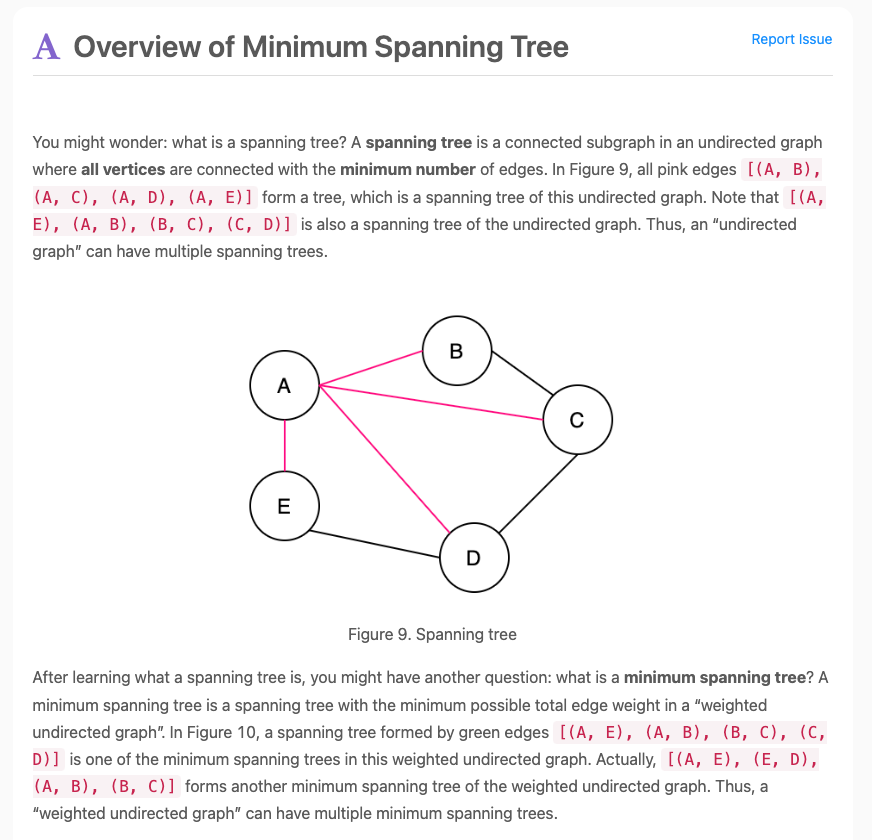

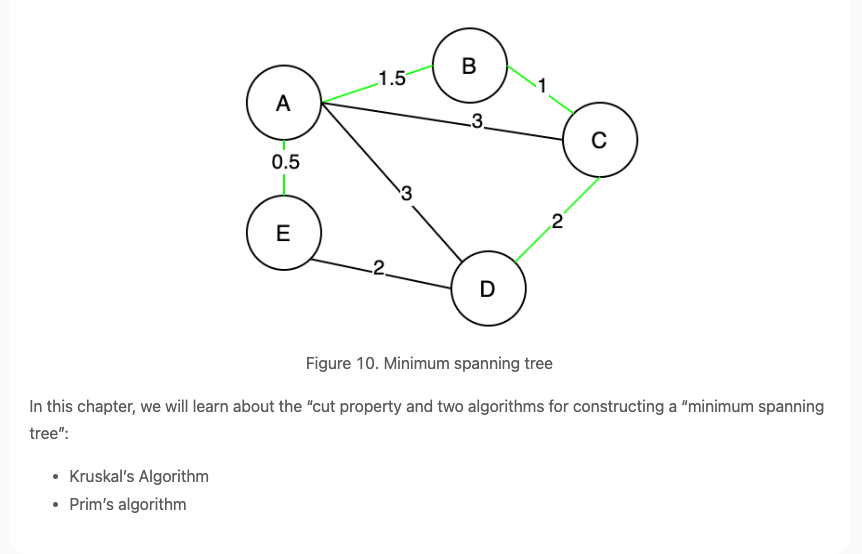

In [ ]:
# Cut Property

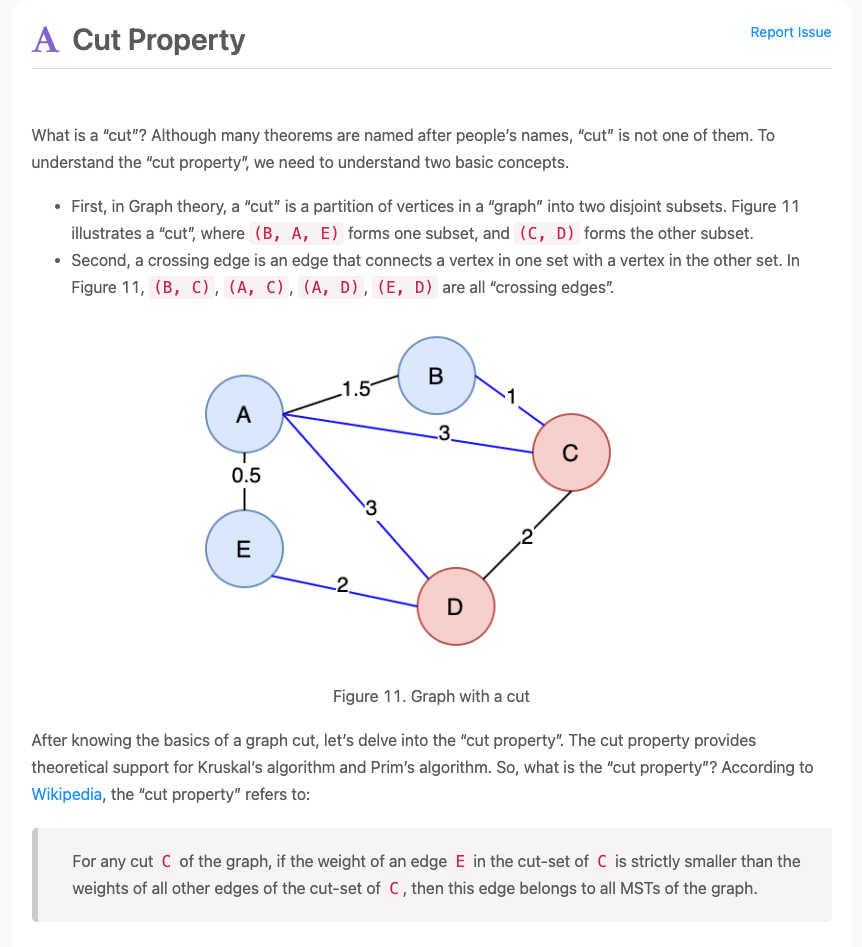

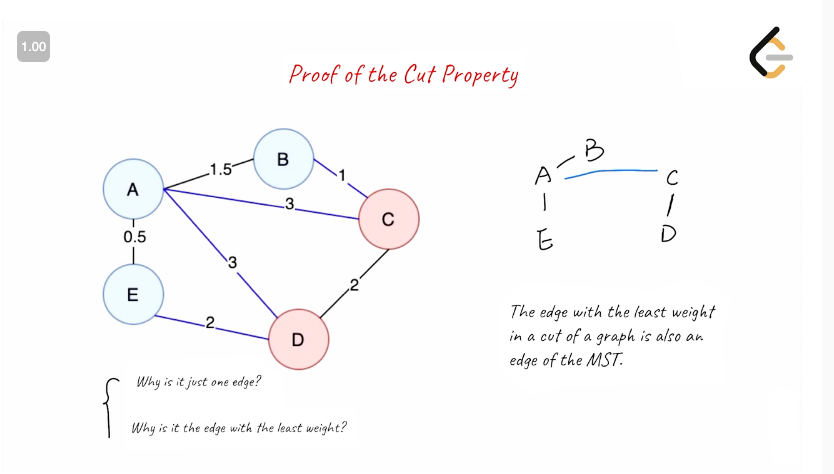

In [ ]:
# Kruskal’s Algorithm

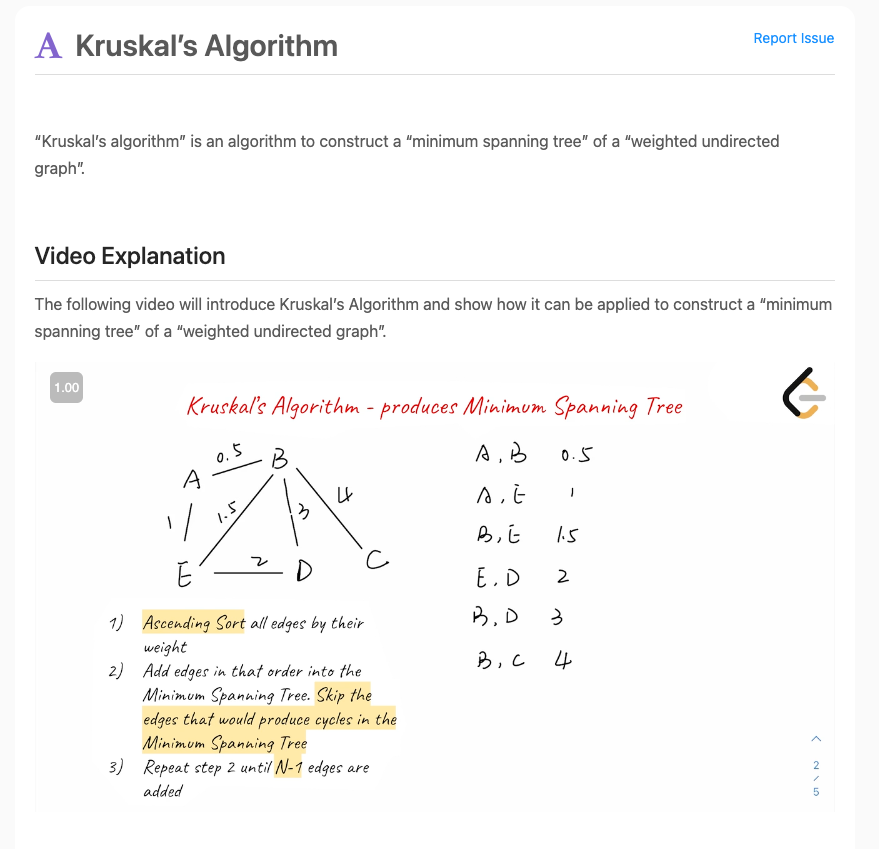

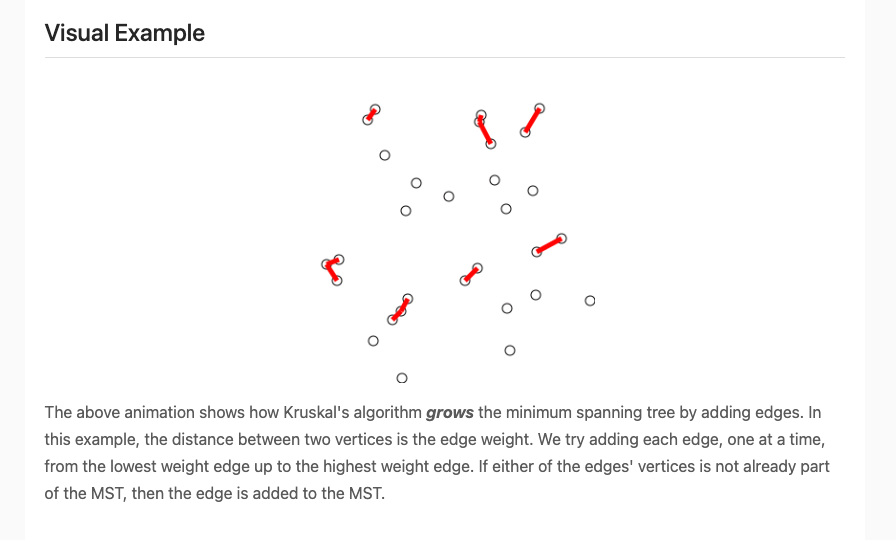

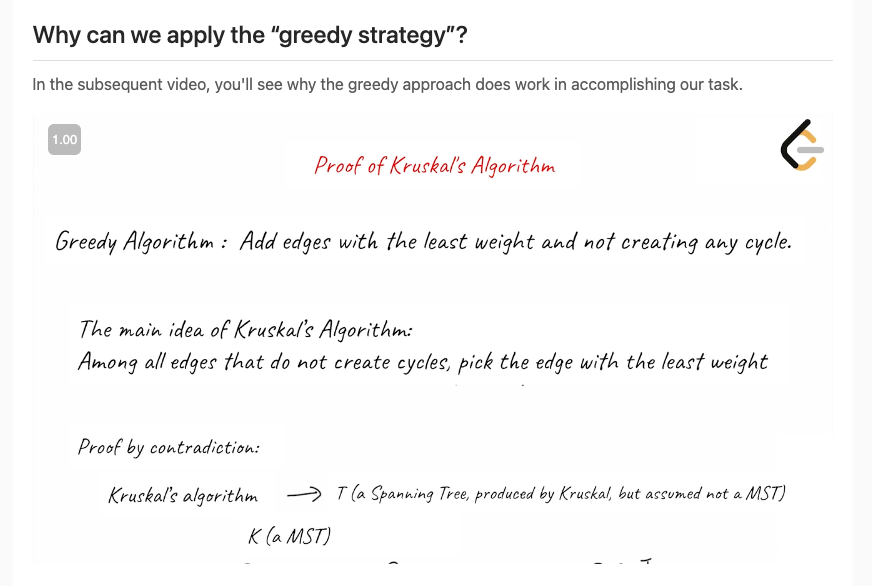

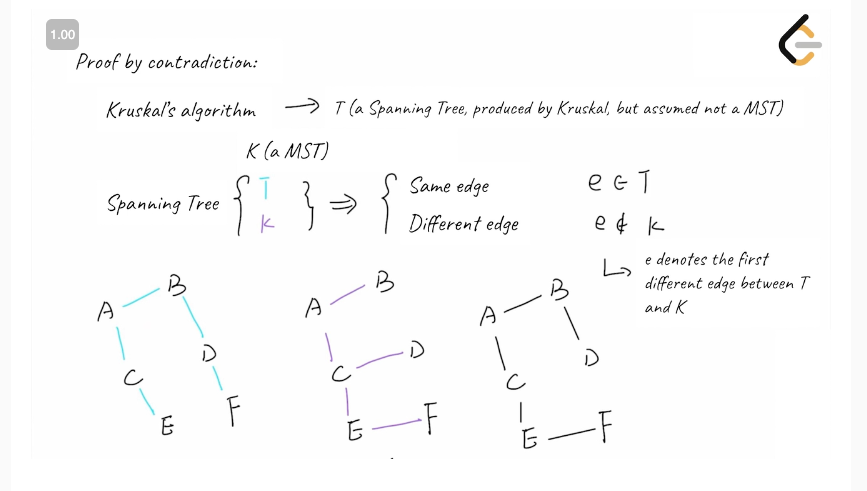

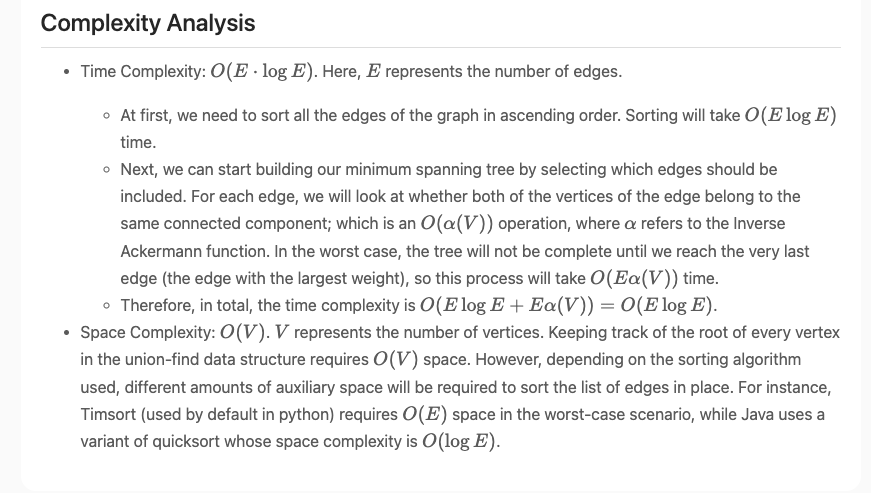

In [ ]:
# Min Cost to Connect All Points

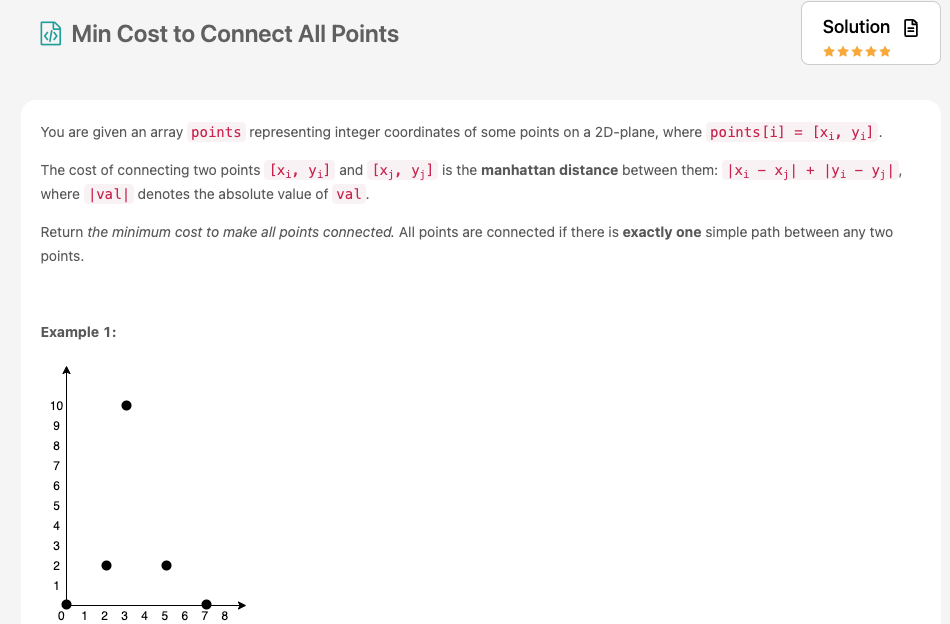

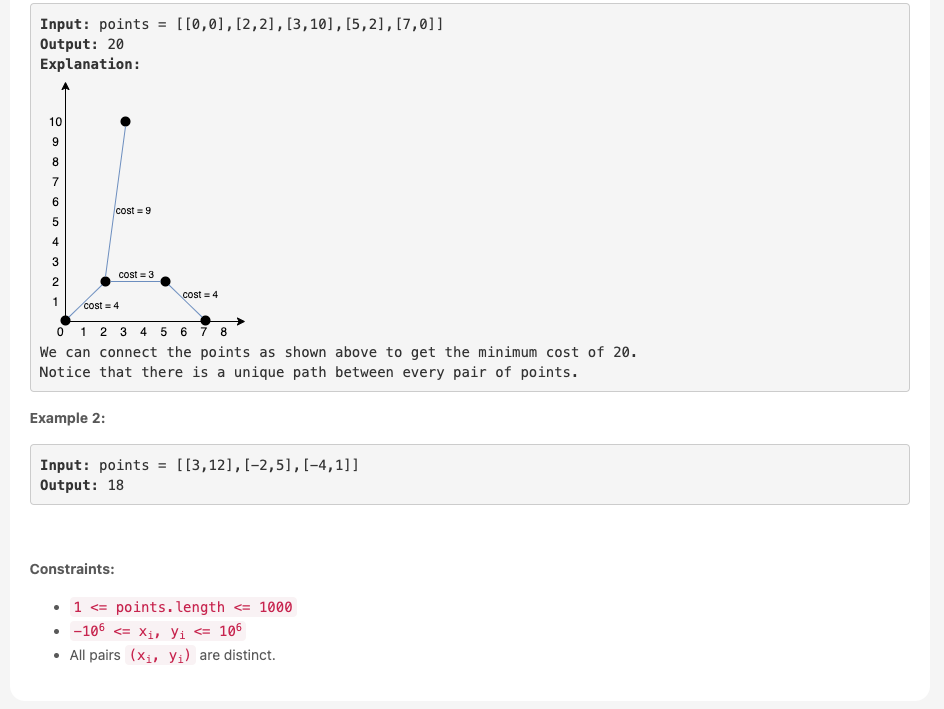

In [ ]:
# Accepted v1
# UnionFind class
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        # Use a rank array to record the height of each vertex, i.e., the "rank" of each vertex.
        # The initial "rank" of each vertex is 1, because each of them is
        # a standalone vertex with no connection to other vertices.
        self.rank = [1] * size

    # The find function here is the same as that in the disjoint set with path compression.
    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]

    # The union function with union by rank
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)

class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        if len(points)<=1:
            return 0

        def calculate_distance(p1,p2):
            # return sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
            return abs(p1[0]-p2[0])+abs(p1[1]-p2[1])
        
        def calculate_all_distance(points):
            distance_mapping = {}
            for i in range(len(points)):
                for j in range(i+1, len(points)):
                    distance_mapping[(i,j)] = round(calculate_distance(points[i],points[j]),2)
            return distance_mapping
        
        distance_mapping = calculate_all_distance(points)
        distance_list = sorted([(k,v) for k,v in distance_mapping.items()], key=lambda x:x[1])
        # print(distance_list)
        
        uf = UnionFind(len(points))
        # 1-2-5-6-7 3-8-9 4
        uf.union(*distance_list[0][0])
        
        base = distance_list[0][1]
        for i in range(1, len(distance_list)):
            cur,val = distance_list[i]
            if uf.connected(*cur):
                continue
            uf.union(*cur)
            base += val
        
        return base

In [ ]:
# Approach 1: Kruskal's Algorithm
class UnionFind:
    def __init__(self, size: int) -> None:
        self.group = [0] * size
        self.rank = [0] * size
        
        for i in range(size):
            self.group[i] = i
      
    def find(self, node: int) -> int:
        if self.group[node] != node:
            self.group[node] = self.find(self.group[node])
        return self.group[node]

    def join(self, node1: int, node2: int) -> bool:
        group1 = self.find(node1)
        group2 = self.find(node2)
        
        # node1 and node2 already belong to same group.
        if group1 == group2:
            return False

        if self.rank[group1] > self.rank[group2]:
            self.group[group2] = group1
        elif self.rank[group1] < self.rank[group2]:
            self.group[group1] = group2
        else:
            self.group[group1] = group2
            self.rank[group2] += 1

        return True
    
class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        n = len(points)
        all_edges = []
        
        # Storing all edges of our complete graph.
        for curr_node in range(n): 
            for next_node in range(curr_node + 1, n): 
                weight = abs(points[curr_node][0] - points[next_node][0]) +\
                         abs(points[curr_node][1] - points[next_node][1])
                all_edges.append((weight, curr_node, next_node))
      
        
        # Sort all edges in increasing order.
        all_edges.sort()
        
        uf = UnionFind(n)
        mst_cost = 0
        edges_used = 0
        
        for weight, node1, node2 in all_edges:
            if uf.join(node1, node2):
                mst_cost += weight
                edges_used += 1
                if edges_used == n - 1:
                    break
        return mst_cost

In [ ]:
# Approach 2: Prim's Algorithm
class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        n = len(points)
        
        # Min-heap to store minimum weight edge at top.
        heap = [(0, 0)]
        
        # Track nodes which are included in MST.
        in_mst = [False] * n
        
        mst_cost = 0
        edges_used = 0
        
        while edges_used < n:
            weight, curr_node = heapq.heappop(heap)
            
            # If node was already included in MST we will discard this edge.
            if in_mst[curr_node]:
                continue
            
            in_mst[curr_node] = True
            mst_cost += weight
            edges_used += 1
            
            for next_node in range(n):
                # If next node is not in MST, then edge from curr node
                # to next node can be pushed in the priority queue.
                if not in_mst[next_node]:
                    next_weight = abs(points[curr_node][0] - points[next_node][0]) +\
                                  abs(points[curr_node][1] - points[next_node][1])
                    
                    heapq.heappush(heap, (next_weight, next_node))
                    
        return mst_cost

In [ ]:
# Approach 3: Prim's Algorithm (Optimized)
class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        n = len(points)
        mst_cost = 0
        edges_used = 0
        
        # Track nodes which are visited.
        in_mst = [False] * n
        
        min_dist = [math.inf] * n
        min_dist[0] = 0
        
        while edges_used < n:
            curr_min_edge = math.inf
            curr_node = -1
            
            # Pick least weight node which is not in MST.
            for node in range(n):
                if not in_mst[node] and curr_min_edge > min_dist[node]:
                    curr_min_edge = min_dist[node]
                    curr_node = node
            
            mst_cost += curr_min_edge
            edges_used += 1
            in_mst[curr_node] = True
            
            # Update adjacent nodes of current node.
            for next_node in range(n):
                weight = abs(points[curr_node][0] - points[next_node][0]) +\
                         abs(points[curr_node][1] - points[next_node][1])
                
                if not in_mst[next_node] and min_dist[next_node] > weight:
                    min_dist[next_node] = weight
        
        return mst_cost

In [ ]:
class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        if not points or len(points) == 0:
            return 0
        size = len(points)
        pq = []
        uf = UnionFind(size)

        for i in range(size):
            x1, y1 = points[i]
            for j in range(i + 1, size):
                x2, y2 = points[j]
                # Calculate the distance between two coordinates.
                cost = abs(x1 - x2) + abs(y1 - y2)
                edge = Edge(i, j, cost)
                pq.append(edge)
        
        # Convert pq into a heap.
        heapq.heapify(pq)

        result = 0
        count = size - 1
        while pq and count > 0:
            edge = heapq.heappop(pq)
            if not uf.connected(edge.point1, edge.point2):
                uf.union(edge.point1, edge.point2)
                result += edge.cost
                count -= 1
        return result

class Edge:
    def __init__(self, point1, point2, cost):
        self.point1 = point1
        self.point2 = point2
        self.cost = cost

    def __lt__(self, other):
        return self.cost < other.cost

class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1] * size

    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)
    
if __name__ == "__main__":
    points = [[0,0],[2,2],[3,10],[5,2],[7,0]]
    solution = Solution()
    print(f"points = {points}")
    print(f"Minimum Cost to Connect Points = {solution.minCostConnectPoints(points)}")

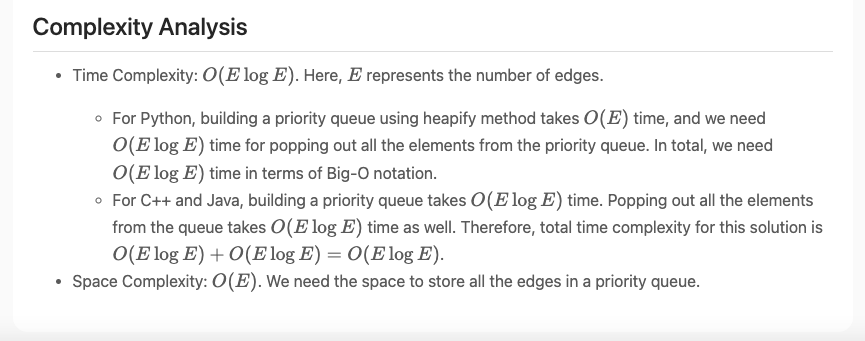

In [ ]:
# Prim’s Algorithm

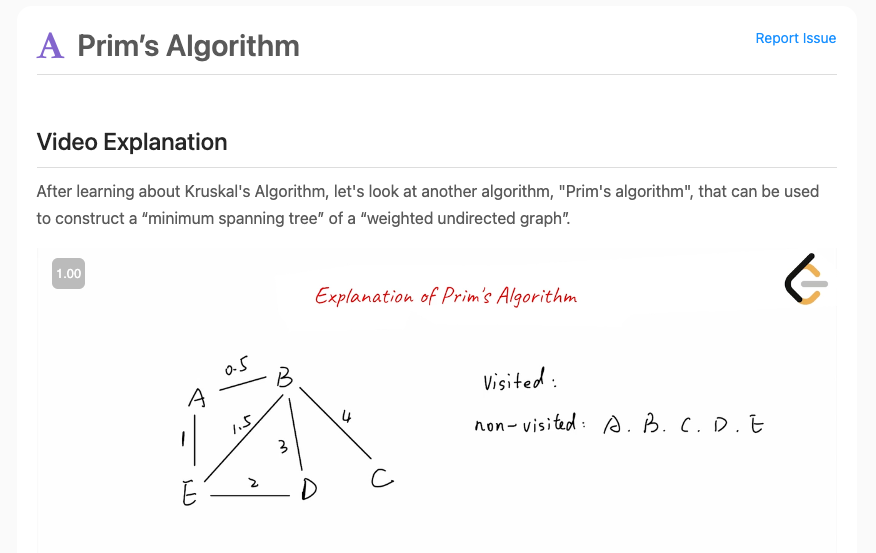

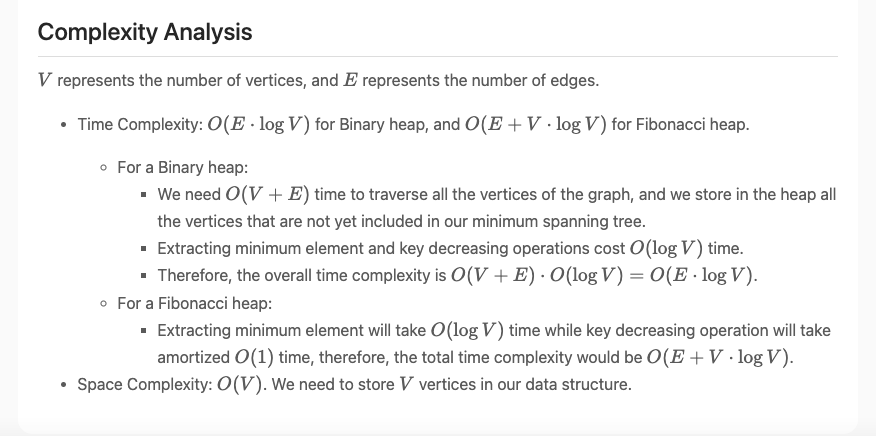

In [ ]:
# Time Exceeded v1
# UnionFind class
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1] * size

    # The find function here is the same as that in the disjoint set with path compression.
    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]

    # The union function with union by rank
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)

class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        if len(points)<=1:
            return 0
        
        def calculate_distance(p1,p2):
            # return sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
            return abs(p1[0]-p2[0])+abs(p1[1]-p2[1])
        
        def calculate_all_distance(points):
            distance_mapping = {}
            for i in range(len(points)):
                for j in range(i+1, len(points)):
                    distance_mapping[(i,j)] = round(calculate_distance(points[i],points[j]),2)
            return distance_mapping
        
        distance_mapping = calculate_all_distance(points)
        # print('distance_mapping:',distance_mapping)
        
        visited = set([0,])
        unvisited = set(range(1,len(points)))
        
        base = 0
        while unvisited:
            min_edge = (None,float('inf'))
            for i in visited:
                for j in unvisited:
                    cost = distance_mapping[tuple(sorted((i,j)))]
                    if cost<min_edge[1]:
                        min_edge = ((i,j), cost)
            visited.add(min_edge[0][1])
            unvisited.remove(min_edge[0][1])
            base += min_edge[1]
        
        return base

In [ ]:
# Accepted v1  Prim with heap
class Edge:
    def __init__(self, point1, point2, cost):
        self.point1 = point1
        self.point2 = point2
        self.cost = cost

    def __lt__(self, other):
        return self.cost < other.cost
    
class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        if len(points)<=1:
            return 0
        
        def calculate_distance(p1,p2):
            # return sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
            return abs(p1[0]-p2[0])+abs(p1[1]-p2[1])
        
        def calculate_all_distance(points):
            distance_mapping = {}
            for i in range(len(points)):
                for j in range(i+1, len(points)):
                    distance_mapping[(i,j)] = round(calculate_distance(points[i],points[j]),2)
            return distance_mapping
        
        # distance_mapping = calculate_all_distance(points)
        # distance_mapping[tuple(sorted((last,j)))]

        visited = set([0,])
        unvisited = set(range(1,len(points)))
        
        base = 0
        last = 0
        hp = []
        while unvisited:
            # print('Visited:',visited)
            # print(unvisited)
            # print([(x.point1, x.point2) for x in hp])
            
            for j in unvisited:
                e = Edge(last,j,calculate_distance(points[last],points[j])) 
                heapq.heappush(hp, e)
             
            cur = heapq.heappop(hp)
            while cur.point2 in visited:
                cur = heapq.heappop(hp)
  
            min_edge = cur
            # print(min_edge.point2)
    
            visited.add(min_edge.point2)
            unvisited.remove(min_edge.point2)
            base += min_edge.cost
            last = min_edge.point2
            
        return base

In [ ]:
# Solutions
class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        if not points or len(points) == 0:
            return 0
        size = len(points)
        pq = []
        visited = [False] * size
        result = 0
        count = size - 1
        # Add all edges from points[0] vertexs
        x1, y1 = points[0]
        for j in range(1, size):
            # Calculate the distance between two coordinates.
            x2, y2 = points[j]
            cost = abs(x1 - x2) + abs(y1 - y2)
            edge = Edge(0, j, cost)
            pq.append(edge)
        
        # Convert pq to a heap.
        heapq.heapify(pq)

        visited[0] = True
        while pq and count > 0:
            edge = heapq.heappop(pq)
            point1 = edge.point1
            point2 = edge.point2
            cost = edge.cost
            if not visited[point2]:
                result += cost
                visited[point2] = True
                for j in range(size):
                    if not visited[j]:
                        distance = abs(points[point2][0] - points[j][0]) + \
                                   abs(points[point2][1] - points[j][1])
                        heapq.heappush(pq, Edge(point2, j, distance))
                count -= 1
        return result

class Edge:
    def __init__(self, point1, point2, cost):
        self.point1 = point1
        self.point2 = point2
        self.cost = cost

    def __lt__(self, other):
        return self.cost < other.cost
    
if __name__ == "__main__":
    points = [[0,0],[2,2],[3,10],[5,2],[7,0]]
    solution = Solution()
    print(f"points = {points}")
    print(f"Minimum Cost to Connect Points = {solution.minCostConnectPoints(points)}")